Using TensorFlow backend.


(50000, 28, 28) (50000,)


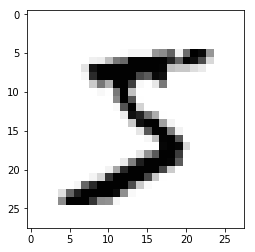

In [1]:
from preprocessed_mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
print(X_train.shape, y_train.shape)
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')
plt.imshow(X_train[0], cmap="Greys");

In [2]:
X_train = X_train.reshape(X_train.shape[0],-1)
X_val = X_val.reshape(X_val.shape[0],-1)
X_test = X_test.reshape(X_test.shape[0],-1)

In [3]:
import tensorflow as tf
import numpy as np
n_inputs = 28*28
n_hidden1 = 200
n_hidden2 = 100

n_outputs = 10
X=tf.placeholder(tf.float32,shape=(None,n_inputs),name="X")
y=tf.placeholder(tf.int64,shape=(None),name="y")

In [4]:
def dnn_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="Weights")
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z

In [5]:
with tf.name_scope("dnn"):
    hidden1 = dnn_layer(X, n_hidden1, name="hidden1",
                           activation=tf.nn.relu)
    hidden2 = dnn_layer(hidden1, n_hidden2, name="hidden2",
                           activation=tf.nn.relu)
    logits = dnn_layer(hidden2, n_outputs, name="outputs")

In [6]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [7]:
learning_rate = 0.1

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [8]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [11]:
init = tf.global_variables_initializer()
n_epochs = 200
batch_size = 1000

In [10]:
from sklearn.utils import shuffle
from matplotlib import pyplot as plt

x_iter = []
acc_list = []
acc_val_list = []
acc_test_list = []
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        X_train, y_train = shuffle(X_train, y_train)
        for i in range(0, X_train.shape[0], batch_size):
            X_batch = X_train[i:i + batch_size]
            y_batch = y_train[i:i + batch_size]
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: X_val,
                                            y: y_val})
        acc_test = accuracy.eval(feed_dict={X: X_test,
                                            y: y_test})
        print(epoch, "Train accuracy:", acc_train, "Val accuracy:", acc_val, "test accuracy:", acc_test)
        x_iter.append(epoch)
        acc_list.append(acc_train)
        acc_val_list.append(acc_val)
        acc_test_list.append(acc_test)


0 Train accuracy: 0.871 Val accuracy: 0.8848 test accuracy: 0.8776
1 Train accuracy: 0.889 Val accuracy: 0.9047 test accuracy: 0.9011
2 Train accuracy: 0.901 Val accuracy: 0.9216 test accuracy: 0.9156
3 Train accuracy: 0.907 Val accuracy: 0.9275 test accuracy: 0.9213
4 Train accuracy: 0.922 Val accuracy: 0.9312 test accuracy: 0.9275
5 Train accuracy: 0.931 Val accuracy: 0.9375 test accuracy: 0.9309
6 Train accuracy: 0.946 Val accuracy: 0.9419 test accuracy: 0.9372
7 Train accuracy: 0.94 Val accuracy: 0.9448 test accuracy: 0.9405
8 Train accuracy: 0.955 Val accuracy: 0.9459 test accuracy: 0.9416
9 Train accuracy: 0.951 Val accuracy: 0.9497 test accuracy: 0.9457
10 Train accuracy: 0.956 Val accuracy: 0.9508 test accuracy: 0.9469
11 Train accuracy: 0.957 Val accuracy: 0.9522 test accuracy: 0.9476
12 Train accuracy: 0.961 Val accuracy: 0.9528 test accuracy: 0.9485
13 Train accuracy: 0.943 Val accuracy: 0.9544 test accuracy: 0.951
14 Train accuracy: 0.958 Val accuracy: 0.957 test accuracy: 

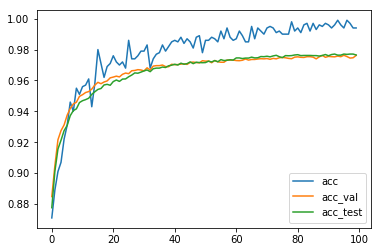

In [12]:
plt.plot(x_iter, acc_list, label="acc")
plt.plot(x_iter, acc_val_list, label="acc_val")
plt.plot(x_iter, acc_test_list, label="acc_test")
plt.legend()
plt.show();
